In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm

In [3]:
np.random.seed(42)

In [4]:
SIZE = 320

In [5]:
noisy_data = []

path1 = r'E:\IITGN_Project\autoencoder\data\Noisy_folder'
files=os.listdir(path1)
for i in tqdm(files):
    img = cv2.imread(path1 + '/' + i, 0)
    img = cv2.resize(img, (SIZE, SIZE))
    noisy_data.append(img_to_array(img))
    
clean_data = []
path2 = r'E:\IITGN_Project\autoencoder\data\Ground_truth'
files=os.listdir(path2)
for i in tqdm(files):
    img = cv2.imread(path2 + '/' + i, 0)
    img = cv2.resize(img, (SIZE, SIZE))
    clean_data.append(img_to_array(img))


100%|██████████| 300/300 [00:00<00:00, 373.34it/s]


In [6]:
noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255.
clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.

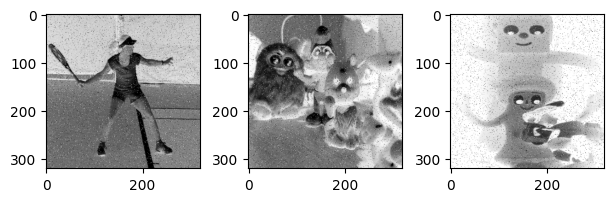

In [7]:
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax=plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap='binary')
plt.show()

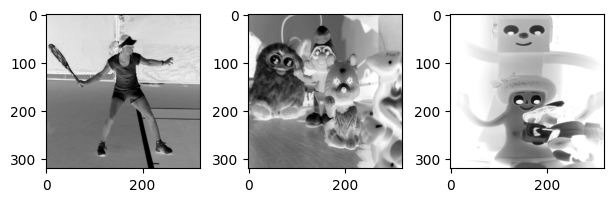

In [8]:
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax=plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap='binary')
plt.show()

In [9]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

c:\Users\omvis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 320, 320, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 80, 80, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 40, 40, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 40, 40, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 80, 80, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 160, 160, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 160, 160, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 320, 320, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 320, 320, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(noisy_train, clean_train, test_size=0.20, random_state=0)

In [11]:
# Set up data augmentation
aug_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

# Fit augmentation on training data
aug_gen.fit(x_train)
aug_gen.fit(y_train)


In [12]:
# Set up callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# Train with augmentation
model.fit(
    aug_gen.flow(x_train, y_train, batch_size=16),
    epochs=150, 
    shuffle=True, 
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=callbacks)

c:\Users\omvis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0206 - loss: 0.1606 - val_accuracy: 0.0120 - val_loss: 0.0455 - learning_rate: 0.0010
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 729ms/step - accuracy: 0.0211 - loss: 0.0706 - val_accuracy: 0.0126 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 639ms/step - accuracy: 0.0158 - loss: 0.0618 - val_accuracy: 0.0132 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 670ms/step - accuracy: 0.0174 - loss: 0.0603 - val_accuracy: 0.0133 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 583ms/step - accuracy: 0.0208 - loss: 0.0570 - val_accuracy: 0.0133 - val_loss: 0.0328 - learning_rate: 0.0010
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 573ms/step - accuracy: 0.0157 - loss: 0.0599 - val_accuracy: 0.0133 - val_loss: 0.0308 - learning_rate: 0.0010
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 661ms/step - accuracy: 0.0228 - loss: 

In [13]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_val), np.array(y_val))[1]*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step - accuracy: 0.0135 - loss: 0.0314
Test_Accuracy: 1.33%


In [14]:
model.save('autoencoder_custom_img.keras')


In [15]:
no_noise_img = model.predict(x_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


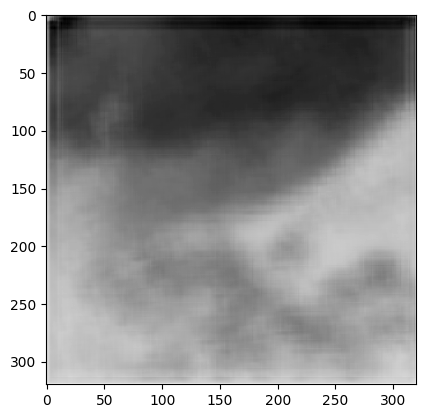

In [16]:
plt.imshow(no_noise_img[i].reshape(SIZE, SIZE), cmap='binary')